Author : Rajnikant Sharma

Batch : September

Domain : Data Science

Aim: To devlop a model that can classify into diffrent species based on their sepal and petal measurements.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # Change kMeans to KMeans
import matplotlib.pyplot as plt
import seaborn as sns

DOWNLOADING DATASETS

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isna(  ).sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Hence its time to visualize the data

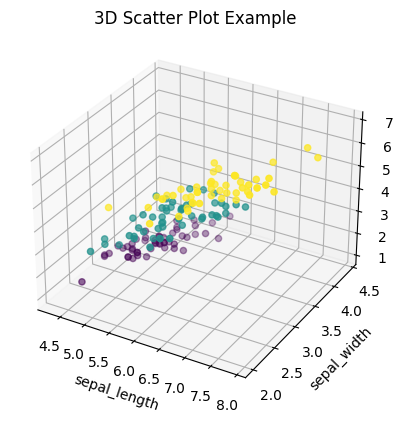

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'])
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot Example')
plt.show()

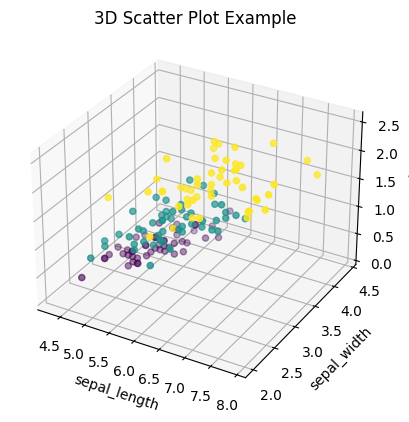

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_width'], c=df['species'])
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('species')
plt.title('3D Scatter Plot Example')
plt.show()

Thus 3-D plot gives us the glimps of species of iris flower is more inclined towards the variables petal length and petal width

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

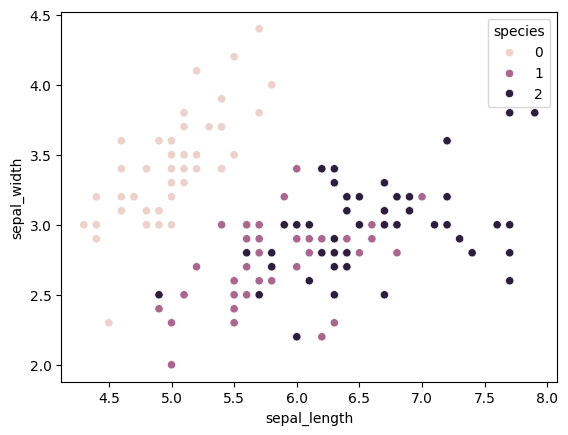

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)

<Axes: xlabel='sepal_length', ylabel='petal_width'>

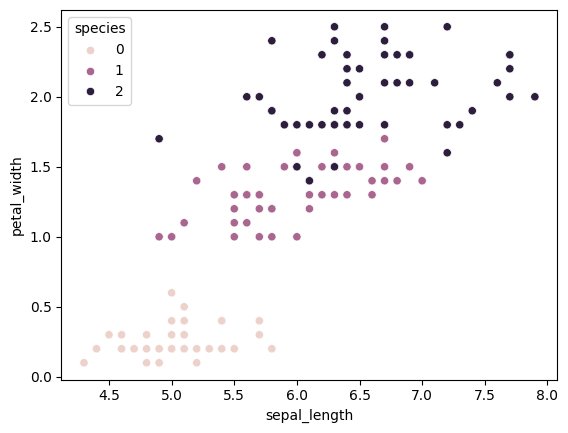

In [ ]:
sns.scatterplot(x='sepal_length',y='petal_width',hue='species',data=df)

Applying Elbow Technique

In [ ]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal_length','sepal_width']])
    sse.append(km.inertia_)

In [ ]:
sse

[130.4752666666667,
 58.204092789066756,
 37.08627024722935,
 28.034982153246226,
 23.912460317460315,
 19.2444869047369,
 15.65766561025181,
 13.347379083275825,
 12.93423000610501]

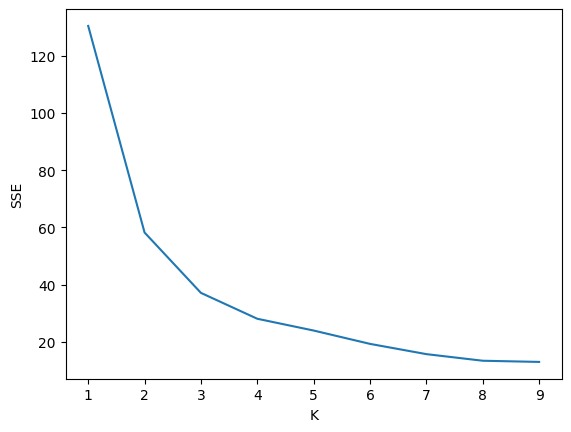

In [ ]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

Applying kMean Algorithm

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_length','sepal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [ ]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

df['cluster'] = y_predicted
cm = confusion_matrix(df['species'], df['cluster']) # Now you can use confusion_matrix directly
cm

array([[50,  0,  0],
       [ 0, 12, 38],
       [ 0, 35, 15]])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming your data is in a CSV file named 'iris.csv'
# Replace 'iris.csv' with the actual file name if different
# If the file is not in the same directory as your script,
# provide the full path to the file, for example:
# df = pd.read_csv('/path/to/your/file/iris.csv')
try:
    df = pd.read_csv('iris.csv')
except FileNotFoundError:
    print("File 'iris.csv' not found. Please make sure the file is in the correct directory or provide the full path.")
    # If the file is in a different directory, use the full path:
    # df = pd.read_csv('/path/to/your/file/iris.csv')  # Replace with the actual path
    # For example, if the file is in your Downloads folder:
    # df = pd.read_csv('/home/user/Downloads/iris.csv')  # Replace 'user' with your username
    # You can also try using a relative path if the file is in a subfolder:
    # df = pd.read_csv('./data/iris.csv')  # Assuming 'iris.csv' is in a 'data' subfolder
    # If you are using Google Colab, you might need to upload the file first.
    # Exit the script if the file is not found to avoid further errors
    exit()

# Continue with your existing code:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_length', 'sepal_width']])
y_predicted

df['cluster'] = y_predicted
df.head(150)

df['cluster'] = y_predicted
cm = confusion_matrix(df['species'], df['cluster'])
cm

true_labels = df.species
predicted_labels = df.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
Tick_marks = np.arange(len(class_labels))
plt.xticks(Tick_marks, class_labels, rotation=45)
plt.yticks(Tick_marks, class_labels)

# fill matrix with values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

File 'iris.csv' not found. Please make sure the file is in the correct directory or provide the full path.


NameError: name 'df' is not defined